En el blog https://towardsdatascience.com/
linear-regression-using-gradient-descent-97a6c8700931 se explica con
claridad como usar el descenso de gradiente para un problema simple de regresión
lineal. Aplícalo a algún conjunto de datos que quieras en una libreta de Jupyter
explicando cada paso de manera cuidadosa. Extra: Teóricamente, este problema de
regresión lineal se puede resolver usando únicamente álgebra lineal (pero no es muy
eficiente computacionalmente). ¿Podrías explicar cómo? Busca por ejemplo cómo se
resuelve usando SVD.

1.- Preparemos los datos.

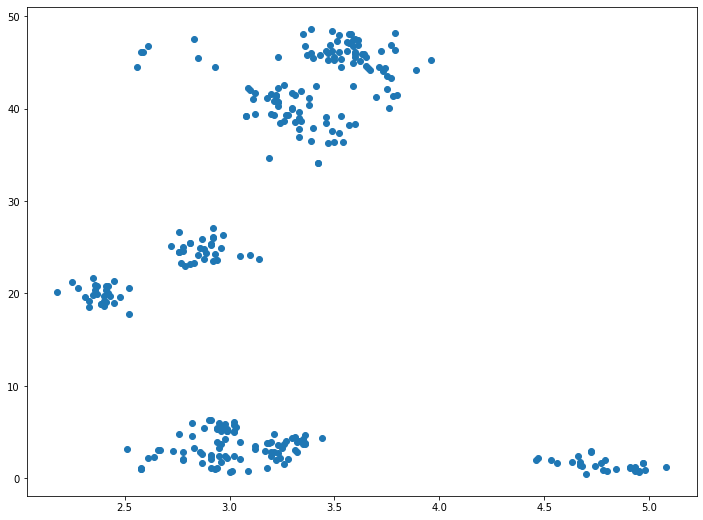

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
plt.rcParams['figure.figsize'] = (12.0, 9.0)

df = pd.read_csv('../data/dataset.csv') # Pizza dataset
x = df.loc[:, 'cal']
y = df.loc[:, 'carb']
plt.scatter(x, y)
plt.show()

Podemos observar que la distribución de carbohidratos y calorías en distintas muestras de pizza posee
comportamientos que tienden al aglomeramiento (seguramente, por marca/compañía) pero igual, para efectos
de practicar descenso de gradiente veremos a donde nos lleva este sample.

Construiremos un modelo para realizar el descenso de gradiente, similar al de la fuente:

In [55]:
m = 0 # Initial slope
c = 0 # Initial Y axis cross

# Opposed to the blogpost, there's usually little value in single word variable names
# except perhaps for math symbols/idioms.
learningRate = 0.001
iterations = 1000

# Our pop size
n = float(len(x))

# Gradient descent function
for i in range(iterations):
    predictedY = m*x + c # A pretty normal linear function
    mDeriv = (-2/n) * sum(x * (y - predictedY))
    cDeriv = (-2/n) * sum(y - predictedY)
    # The new value of m is m after we subtract the learning rate by the calculated derivative
    # effectively giving us, on the first iteration a negative slope that marks the inclination of the linear regression
    m = m - learningRate * mDeriv
    # Similarly, let's ajust where it should begin in the Y axis.
    c = c - learningRate * cDeriv

print(m, c)

5.778486899011775 3.269264432229711


Dado el resultado anterior (al momento de la ejecución de este cuaderno, 11/14)
la función que describe la regresión lineal es

Carbohidrato = 2.96*Caloría + 12

Aunque sospecho que dada la dispersión, saber cuantos carbohidratos tiene una pizza basado en sus calorías
con esta función puede no ser información de particular utilidad (o inclusive, errónea)

Veamos la gráfica de todas formas:

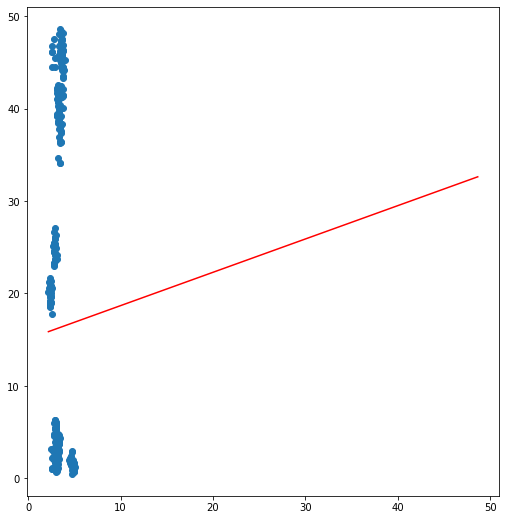

In [56]:
predictedY = m*x + c

plt.scatter(x, y)
plt.plot([min(x), max(y)], [min(predictedY), max(predictedY)], color='red')
plt.gca().set_aspect('equal')
plt.show()

También podemos resolverlo solo con álgebra lineal, por medio de mínimos cuadrados lineales, aunque también
se puede hacer con descomposición en valores singulares.

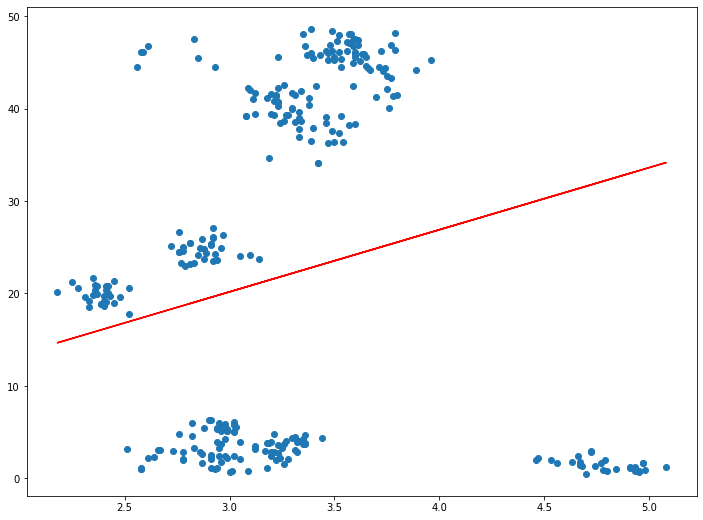

In [57]:
x = x.values.reshape((len(x), 1))

b = inv(x.T.dot(x)).dot(x.T).dot(y)

calculatedY = x.dot(b)

plt.scatter(x, y)
plt.plot(x, calculatedY, color='red')
plt.show()